<a href="https://colab.research.google.com/github/kay-kay-t/CodingDojo/blob/main/Neural_Network_Exercise(Kaggle_Competition).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

From [Kaggle](https://www.kaggle.com/c/restaurant-revenue-prediction/overview)

Data fields
* Id : Restaurant id. 
* Open Date : opening date for a restaurant
* City : City that the restaurant is in. Note that there are unicode in the names. 
* City Group: Type of the city. Big cities, or Other. 
* Type: Type of the restaurant. FC: Food Court, IL: Inline, DT: Drive Thru, MB: Mobile
* P1, P2 - P37: There are three categories of these obfuscated data. Demographic data are gathered from third party providers with GIS systems. These include population in any given area, age and gender distribution, development scales. Real estate data mainly relate to the m2 of the location, front facade of the location, car park availability. Commercial data mainly include the existence of points of interest including schools, banks, other QSR operators.
* Revenue: The revenue column indicates a (transformed) revenue of the restaurant in a given year and is the target of predictive analysis. Please note that the values are transformed so they don't mean real dollar values. 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report, plot_confusion_matrix, confusion_matrix
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Data/train.csv')
df.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0


In [5]:
# I added this here and you will see how I do all of the same steps to TEST as you do to df
TEST = pd.read_csv('/content/drive/MyDrive/Data/test.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    object 
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          137 non-null    int64  
 11  P7          137 non-null    int64  
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

In [7]:
# Dups
df.duplicated().any()

False

In [8]:
TEST.duplicated().any()

False

In [9]:
# Missing values
df.isnull().sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64

In [10]:
# Missing values
TEST.isnull().sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
dtype: int64

In [11]:
# convert the 'Date' column to datetime format and to int 
df['Open Date']= pd.to_datetime(df['Open Date']).astype(np.int64)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    int64  
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          137 non-null    int64  
 11  P7          137 non-null    int64  
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

In [12]:
# convert the 'Date' column to datetime format and to int 
TEST['Open Date']= pd.to_datetime(TEST['Open Date']).astype(np.int64)
TEST.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 42 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Id          100000 non-null  int64  
 1   Open Date   100000 non-null  int64  
 2   City        100000 non-null  object 
 3   City Group  100000 non-null  object 
 4   Type        100000 non-null  object 
 5   P1          100000 non-null  int64  
 6   P2          100000 non-null  float64
 7   P3          100000 non-null  float64
 8   P4          100000 non-null  float64
 9   P5          100000 non-null  int64  
 10  P6          100000 non-null  int64  
 11  P7          100000 non-null  int64  
 12  P8          100000 non-null  int64  
 13  P9          100000 non-null  int64  
 14  P10         100000 non-null  int64  
 15  P11         100000 non-null  int64  
 16  P12         100000 non-null  int64  
 17  P13         100000 non-null  float64
 18  P14         100000 non-null  int64  
 19  P15

In [13]:
# Dropping id column
df.drop(columns=['Id'], inplace=True)
df.head()

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,932169600000000000,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1202947200000000000,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0
2,1362787200000000000,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0
3,1328140800000000000,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0
4,1241827200000000000,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0


In [14]:
# Dropping id column
TEST.drop(columns=['Id'], inplace=True)
TEST.head()

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,1295654400000000000,Niğde,Other,FC,1,4.0,4.0,4.0,1,2,5,4,5,5,5,3,4.0,0,0,0,2,0,5,5,3,1,4,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0
1,1300406400000000000,Konya,Other,IL,3,4.0,4.0,4.0,2,2,5,3,4,4,2,4,5.0,0,0,0,0,0,5,5,3,2,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0
2,1383091200000000000,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,2,5,4,4,5,4,5,5.0,0,0,0,0,0,5,5,5,5,5,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0
3,1367798400000000000,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,3,5,4,5,4,3,4,5.0,0,0,0,0,4,4,4,3,2,2,0,0,0.0,0.0,2.0,3.0,0,4,0,0,0,0,0,0
4,1375228800000000000,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,2,5,4,5,4,3,5,4.0,0,0,0,0,0,1,5,3,1,1,0,0,0.0,0.0,5.0,3.0,0,0,0,0,0,0,0,0


In [15]:
# Dealing with obj City groups
df['City Group'].value_counts()

Big Cities    78
Other         59
Name: City Group, dtype: int64

In [16]:
df['City Group'] = df['City Group'].map({'Big Cities': 0, 'Other': 1})

In [17]:
TEST['City Group'] = TEST['City Group'].map({'Big Cities': 0, 'Other': 1})

In [18]:
# Dealing with type
df['Type'].value_counts()

FC    76
IL    60
DT     1
Name: Type, dtype: int64

In [19]:
# df['Type'] = df['Type'].map({'FC': 0, 'IL': 1, 'DT' : 2})

In [20]:
# Dealing with City col
df['City'].value_counts()

İstanbul          50
Ankara            19
İzmir              9
Samsun             5
Bursa              5
Sakarya            4
Antalya            4
Tekirdağ           3
Kayseri            3
Diyarbakır         3
Eskişehir          3
Adana              3
Konya              2
Muğla              2
Trabzon            2
Aydın              2
Kastamonu          1
Osmaniye           1
Gaziantep          1
Bolu               1
Isparta            1
Şanlıurfa          1
Denizli            1
Kocaeli            1
Amasya             1
Karabük            1
Tokat              1
Afyonkarahisar     1
Elazığ             1
Balıkesir          1
Kırklareli         1
Kütahya            1
Uşak               1
Edirne             1
Name: City, dtype: int64

In [21]:
# Dummy encoding 
# df = pd.get_dummies(df, columns=['City', 'Type', 'City Group'], drop_first=True)
# df

In [22]:
TEST.head()

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,1295654400000000000,Niğde,1,FC,1,4.0,4.0,4.0,1,2,5,4,5,5,5,3,4.0,0,0,0,2,0,5,5,3,1,4,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0
1,1300406400000000000,Konya,1,IL,3,4.0,4.0,4.0,2,2,5,3,4,4,2,4,5.0,0,0,0,0,0,5,5,3,2,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0
2,1383091200000000000,Ankara,0,FC,3,4.0,4.0,4.0,2,2,5,4,4,5,4,5,5.0,0,0,0,0,0,5,5,5,5,5,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0
3,1367798400000000000,Kocaeli,1,IL,2,4.0,4.0,4.0,2,3,5,4,5,4,3,4,5.0,0,0,0,0,4,4,4,3,2,2,0,0,0.0,0.0,2.0,3.0,0,4,0,0,0,0,0,0
4,1375228800000000000,Afyonkarahisar,1,FC,2,4.0,4.0,4.0,1,2,5,4,5,4,3,5,4.0,0,0,0,0,0,1,5,3,1,1,0,0,0.0,0.0,5.0,3.0,0,0,0,0,0,0,0,0


In [23]:
# Assigning target and features
y = df['revenue']
X = df.drop(columns = 'revenue')

In [24]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [25]:
# Scaling data
ohe = OneHotEncoder(handle_unknown='ignore')
scaler = StandardScaler()

#column_selectors to tell the column transformers which columns to apply which preprocessing to
category_selector = make_column_selector(dtype_include='object')
number_selector = make_column_selector(dtype_include='number')

#list of (transformer, columns) tuples
transformers = [(ohe, category_selector), (scaler, number_selector)]

#column transformer
column_transformer = make_column_transformer((ohe, category_selector), (scaler, number_selector))

#create a preprocessing pipeline to add to a later estimator pipeline
preprocessing_pipeline = make_pipeline(column_transformer)


# **Part 1: Gradient Boosting**

In [26]:
# Instantiate and fit model
gbr = GradientBoostingRegressor()
gbr_pipe = make_pipeline(preprocessing_pipeline, gbr)
gbr_pipe.fit(X_train, y_train)

print('Training accuracy:', gbr_pipe.score(X_train, y_train))
print('Testing accuracy:', gbr_pipe.score(X_test, y_test))

Training accuracy: 0.9726971463943429
Testing accuracy: 0.12021464542989146


Gradient Boosting performing really bad on this dataset. Let's try tuning some params.

In [27]:
params = {'loss' : ['squared_error', 'ls', 'absolute_error'], 'max_depth': [2, 8, 15, 20], 'learning_rate':[0.05, 0.2, 0.3, 0.4], 'n_estimators': [20, 30, 50, 100, 150]}
gs = GridSearchCV(gbr, params, cv=3, return_train_score=True)
gs_pipe = make_pipeline(preprocessing_pipeline, gs)
gs_pipe.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in v

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(transformers=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7f2e32ef00d0>),
                                                                  ('standardscaler',
                                                                   StandardScaler(),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7f2e32ef07d0>)]))])),
                ('gridsearchcv',
                 GridSearchCV(cv=3, estimator=GradientBoostingRegressor(),
                              param_grid={'learning_rate': [0.05, 0.2, 0.3,
                                                           

In [28]:
# Finding best params
gs.best_params_

{'learning_rate': 0.05,
 'loss': 'absolute_error',
 'max_depth': 8,
 'n_estimators': 20}

In [29]:
# Trying with those params
gbr1 = GradientBoostingRegressor(learning_rate=0.05, loss='ls', max_depth=2, n_estimators=20)
gbr1_pipe = make_pipeline(preprocessing_pipeline, gbr1)
gbr1_pipe.fit(X_train, y_train)
print('Training accuracy:', gbr1_pipe.score(X_train, y_train))
print('Testing accuracy:', gbr1_pipe.score(X_test, y_test))

Training accuracy: 0.36893847442008776
Testing accuracy: 0.050877905434774884


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


This decreased overfitting, but performance in general is really bad. 

In [30]:
# Trying with those params
gbr2 = GradientBoostingRegressor(learning_rate=0.001, loss='ls', max_depth=20, n_estimators=500)
gbr2_pipe = make_pipeline(preprocessing_pipeline, gbr2)
gbr2_pipe.fit(X_train, y_train)
print('Training accuracy:', gbr2_pipe.score(X_train, y_train))
print('Testing accuracy:', gbr2_pipe.score(X_test, y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


Training accuracy: 0.6323045752290363
Testing accuracy: 0.11656241573354642


In [31]:
# Checkinh RMSE
train_preds = gbr2_pipe.predict(X_train)
test_preds = gbr2_pipe.predict(X_test)
print('Testing rmse:', np.sqrt(mean_squared_error(y_train, train_preds)))
print('Training rmse:', np.sqrt(mean_squared_error(y_test, test_preds)))

Testing rmse: 1406987.007755711
Training rmse: 2984021.6066941586


So I've tried tunning some params manually and this is the best I could get. I decreased overfitting with setting learning rate to really small one and increased testing accuracy by increasing max_depth and n_estimators.
This model is just not good for this data set I assume.

# **Part 2: Neural Network**

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [33]:
# from keras.wrappers.scikit_learn import KerasRegressor
# def create_model(input_shape = X_train.shape[1]):
#     model = Sequential()
#     # Input layer
#     model.add(Dense(19, input_dim = input_shape, activation = 'relu'))
#     # Middle layer
#     model.add(Dense(10, activation = 'relu'))
#     # Output layer for regression
#     model.add(Dense(1))

#     model.compile(optimizer = 'adam', loss = 'mean_squared_error')

#     return model

In [34]:
# wrap the model using the function you created
# clf = KerasRegressor(build_fn=create_model,verbose=0)

# clf_pipe = make_pipeline(preprocessing_pipeline, clf)
# clf_pipe.fit(X_train, y_train)


In [35]:
# OHE
ohe = OneHotEncoder(handle_unknown='ignore')
X_train_ohe = ohe.fit_transform(X_train)
X_test_ohe = ohe.transform(X_test)

# Scale our data
scaler = StandardScaler(with_mean=False)
X_train = scaler.fit_transform(X_train_ohe)
X_test = scaler.transform(X_test_ohe)


In [36]:
X_train = X_train.toarray()
X_test = X_test.toarray()

In [37]:
# Instantiate model
model = Sequential()
# Save the number of features we have as our input shape
input_shape = X_train.shape[1]
input_shape



409

In [38]:
# Input layer
model.add(Dense(409, input_dim = input_shape, activation = 'relu'))
# Middle layer
model.add(Dense(250, activation = 'relu'))
# Middle layer
model.add(Dense(100, activation = 'relu'))
# Output layer for regression
model.add(Dense(1, activation='linear'))

In [39]:
# Compiling model for regression
model.compile(optimizer = 'adam', loss='mean_squared_error')

In [40]:
[print(i.shape, i.dtype) for i in model.inputs]
[print(o.shape, o.dtype) for o in model.outputs]
[print(l.name, l.input_shape, l.dtype) for l in model.layers]

(None, 409) <dtype: 'float32'>
(None, 1) <dtype: 'float32'>
dense (None, 409) float32
dense_1 (None, 409) float32
dense_2 (None, 250) float32
dense_3 (None, 100) float32


[None, None, None, None]

In [41]:
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test), 
                    epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 59ms/step - loss: 24876664487936.0000 - val_loss: 30924104269824.0000
Epoch 2/100
4/4 [==============================] - 0s 11ms/step - loss: 24876574310400.0000 - val_loss: 30923972149248.0000
Epoch 3/100
4/4 [==============================] - 0s 16ms/step - loss: 24876387663872.0000 - val_loss: 30923676450816.0000
Epoch 4/100
4/4 [==============================] - 0s 13ms/step - loss: 24876016467968.0000 - val_loss: 30923078762496.0000
Epoch 5/100
4/4 [==============================] - 0s 15ms/step - loss: 24875244716032.0000 - val_loss: 30921971466240.0000
Epoch 6/100
4/4 [==============================] - 0s 14ms/step - loss: 24873889955840.0000 - val_loss: 30920050475008.0000
Epoch 7/100
4/4 [==============================] - 0s 12ms/step - loss: 24871497105408.0000 - val_loss: 30916892164096.0000
Epoch 8/100
4/4 [==============================] - 0s 13ms/step - loss: 24867801923584.0000 - val_loss: 30912020480000.0000
Epoch 9/

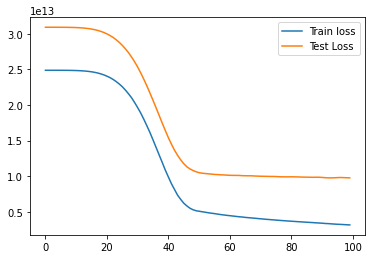

In [42]:
# Visualize the loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

In [43]:
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)
print('Testing rmse:', np.sqrt(mean_squared_error(y_train, train_preds)))
print('Training rmse:', np.sqrt(mean_squared_error(y_test, test_preds)))

Testing rmse: 1767775.9377984733
Training rmse: 3124485.349272828


So comparing GradientBoosting and Neural Networks, the last one did a little bit better. 

Gradient Boosting rmse:
* Testing rmse: 1406987.007755711
* Training rmse: 2981996.4384426684

Neural Networks rmse:
* Testing rmse: 1782983.5623007468
* Training rmse: 3115853.525858727


In [44]:
# Preparing TEST data
TEST = ohe.transform(TEST)
TEST = scaler.transform(TEST)
TEST = TEST.toarray()

In [45]:
TEST_shape = TEST.shape[1]
TEST_shape

409

In [46]:
# Making predictions on TEST data
TEST_preds = model.predict(TEST)

In [47]:
TEST_preds

array([[4551674.5],
       [4074838.8],
       [4390475. ],
       ...,
       [5054794. ],
       [4632760.5],
       [4033228.5]], dtype=float32)

In [48]:
# Converting to df
to_submit = pd.DataFrame(TEST_preds, columns=['Prediction'])
to_submit.reset_index(inplace=True)
to_submit = to_submit.rename(columns = {'index':'Id'})
to_submit.head()
to_submit.tail()

,Id,Prediction
99995,99995,4239840.5
99996,99996,3262584.5
99997,99997,5054794.0
99998,99998,4632760.5
99999,99999,4033228.5


In [49]:
to_submit.to_csv('/content/drive/MyDrive/Data/Submission.csv', index=False)

Competition results
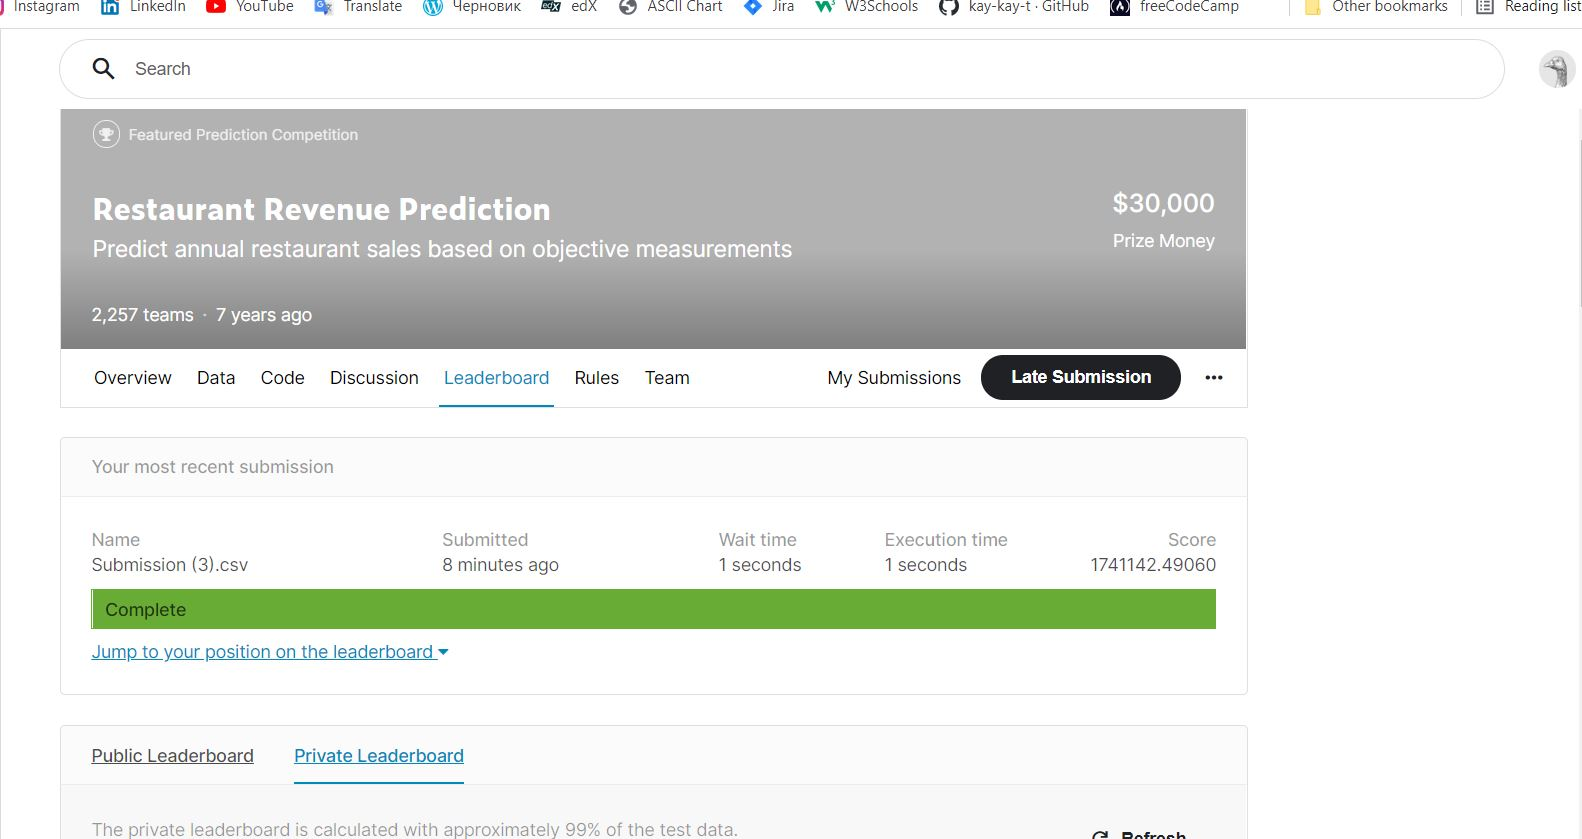